# Advanced topics in Data Visualization

In Data Science, *data visualization* is not just making fancy graphics for reports; it is used extensively in day-to-day work for all phases of a project.

To start with, visual exploration of data is the first thing one tends to do when dealing with a new task. We do preliminary checks and analysis using graphics and tables to summarize the data and leave out the less important details. It is much more convenient for us, humans, to grasp the main points this way than by reading many lines of raw data. It is amazing how much insight can be gained from seemingly simple charts created with available visualization tools.

Next, when we analyze the performance of a model or report results, we also often use charts and images. Sometimes, for interpreting a complex model, we need to project high-dimensional spaces onto more visually intelligible 2D or 3D figures.

All in all, visualization is a relatively fast way to learn something new about your data. Thus, it is vital to learn its most useful techniques and make them part of your everyday ML toolbox.

In this series of tutorials, we are going to get hands-on experience with visual exploration of data using popular libraries such as `pandas`, `matplotlib` and `seaborn`.

_Acknowledgements: this tutorial borrows extensively from mlcourse.ai by Yury Kashnitskiy, for which we are grateful._

## Dataset

Before we get to the data, let's initialize our environment:

In [12]:
# mute warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

Our working datasets consists of (real) data on customer churn for a telecom operator. Let's load the dataset into a `DataFrame`:

In [13]:
df = pd.read_csv("../input/telecom_churn.csv")

To get to know our data, let's look at the first 5 entries using `head()`:

In [14]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. This is why we call it a *target* (machine learning) or *dependent variable* (statistics).

## Visualizing quantitative attributes

There are several options when we want to visualize quantitative features (or attributes).

### Histograms  

Let's start by looking at histograms. This shouldn't be new to you — what's probably new is knowing that is one of most direct ways of taking a first look at how our data behaves.

We'll start by drawing two histograms of `Total day minutes` and `Total intl calls`.

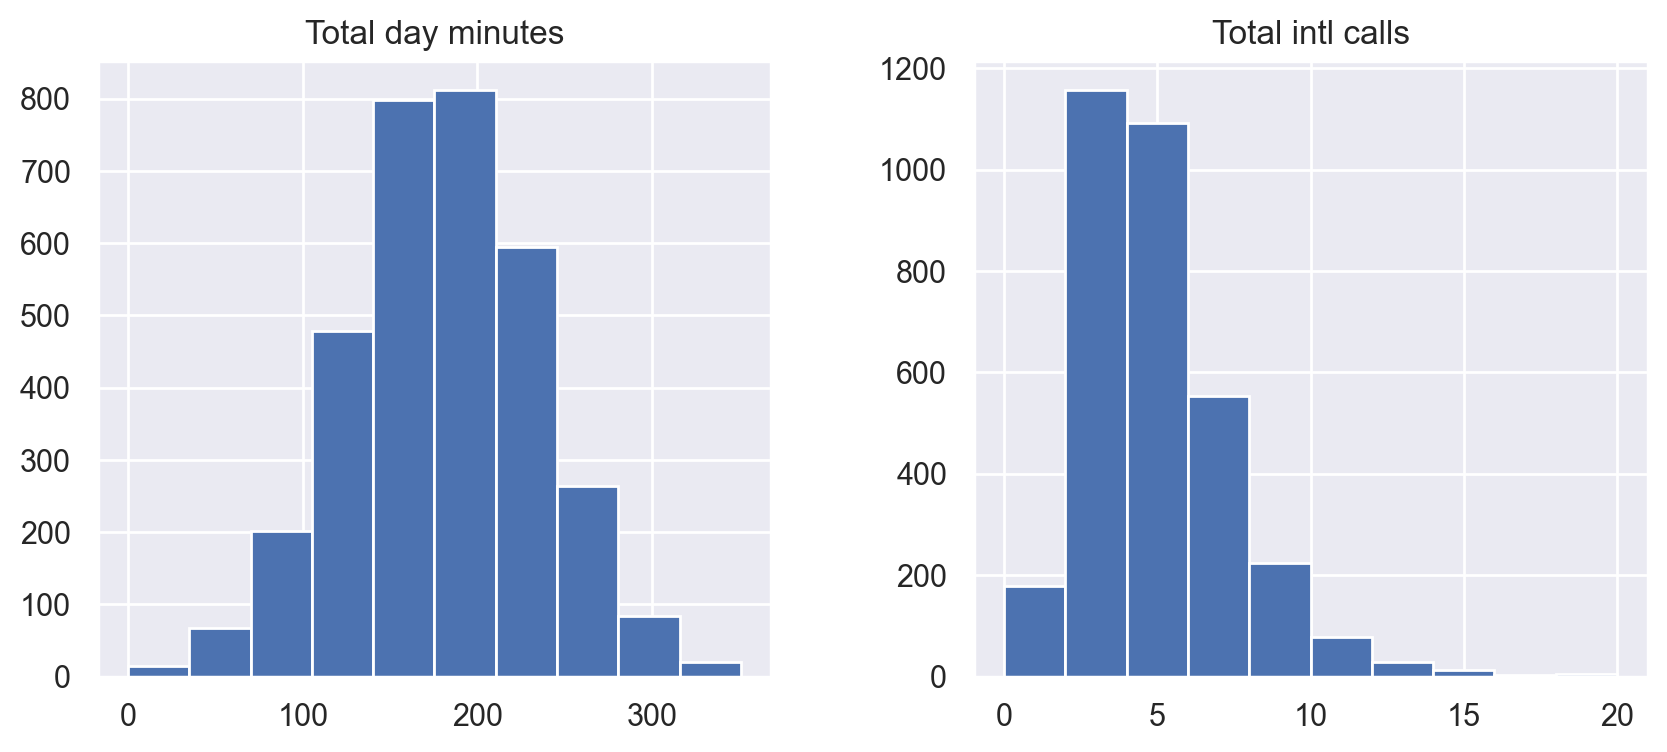

In [15]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

### Kernel density plots

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

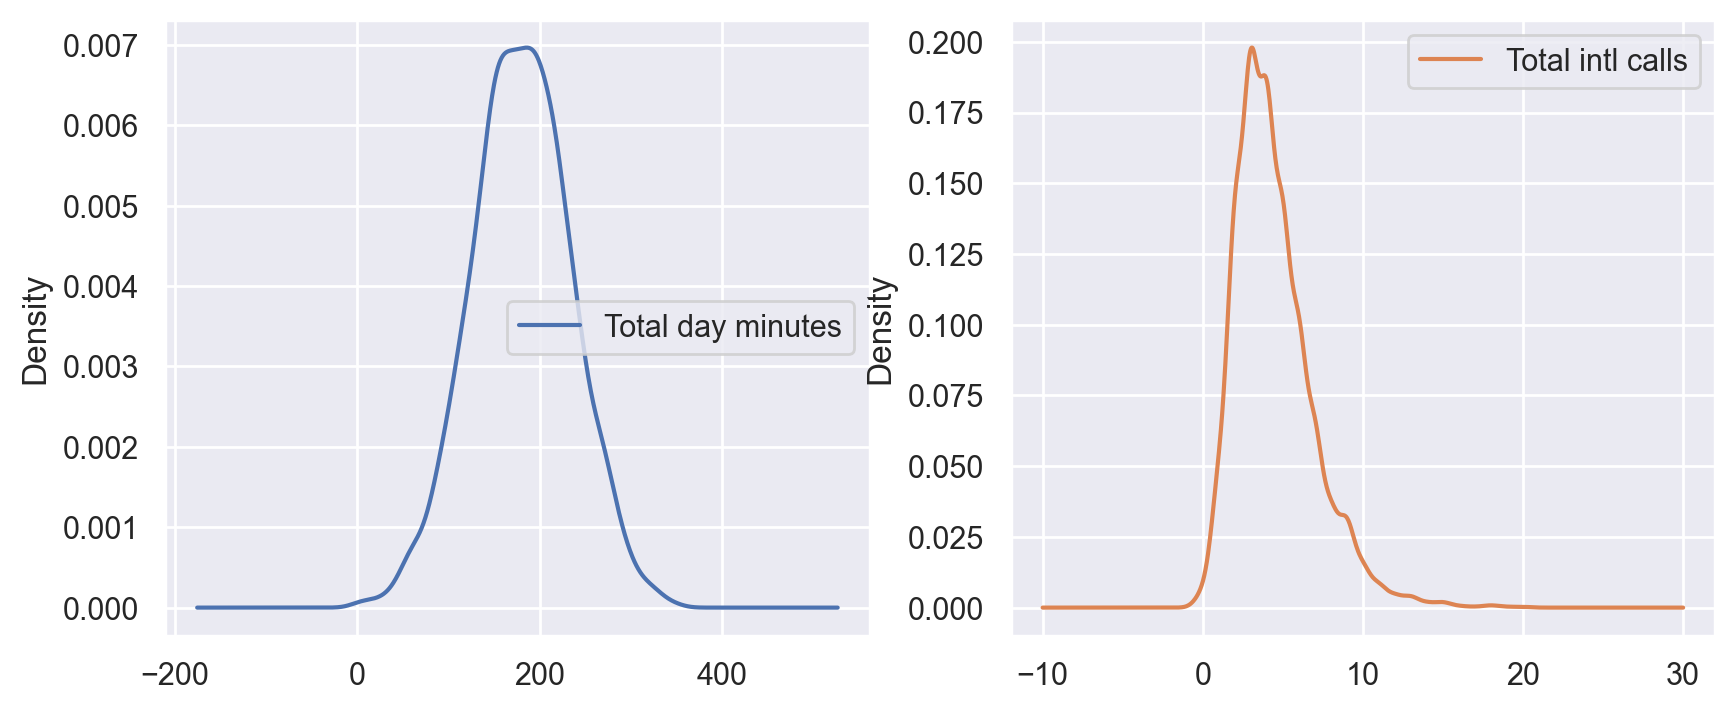

In [16]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

It is also possible to plot a distribution of observations with `seaborn`'s [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). For example, let's look at the distribution of *Total day minutes*. By default, the plot displays both the histogram with the [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) on top.

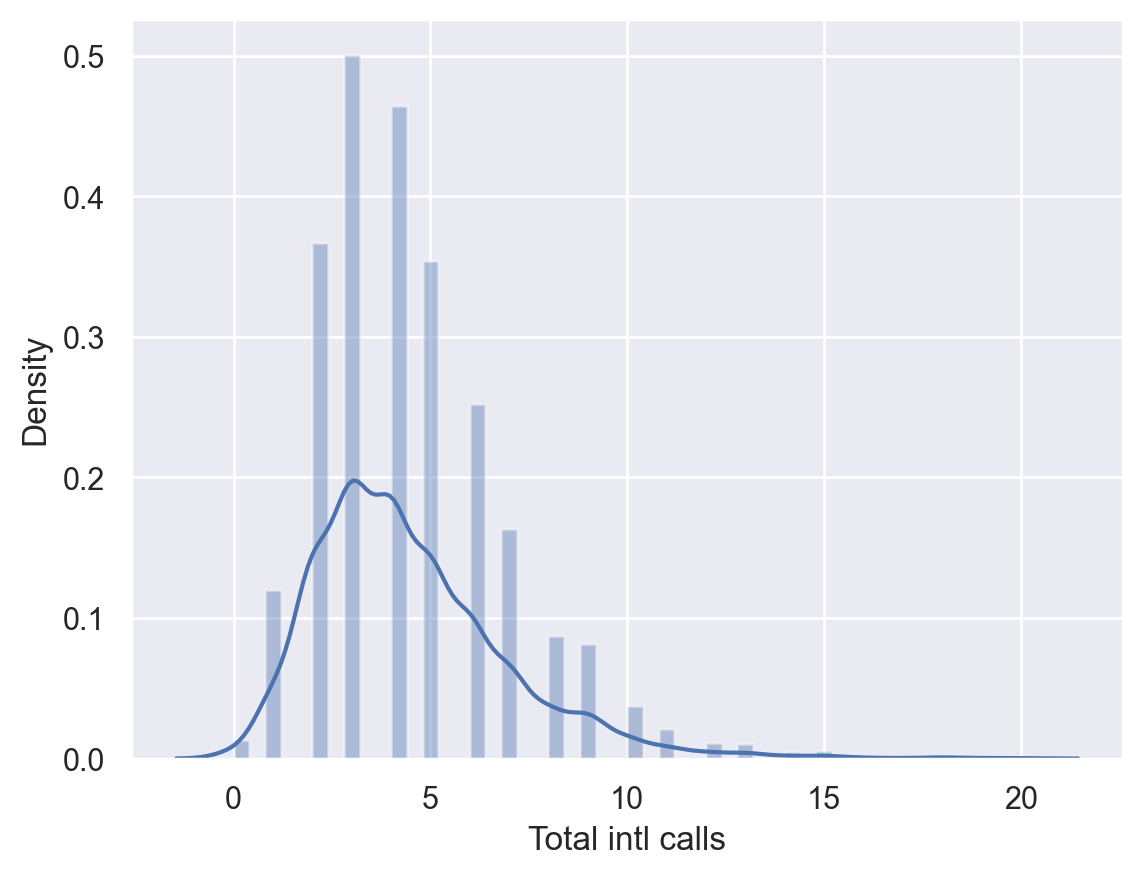

In [17]:
sns.distplot(df["Total intl calls"]);

### Box plot

Another useful type of visualization is a *box plot*. `seaborn` does a great job here:

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

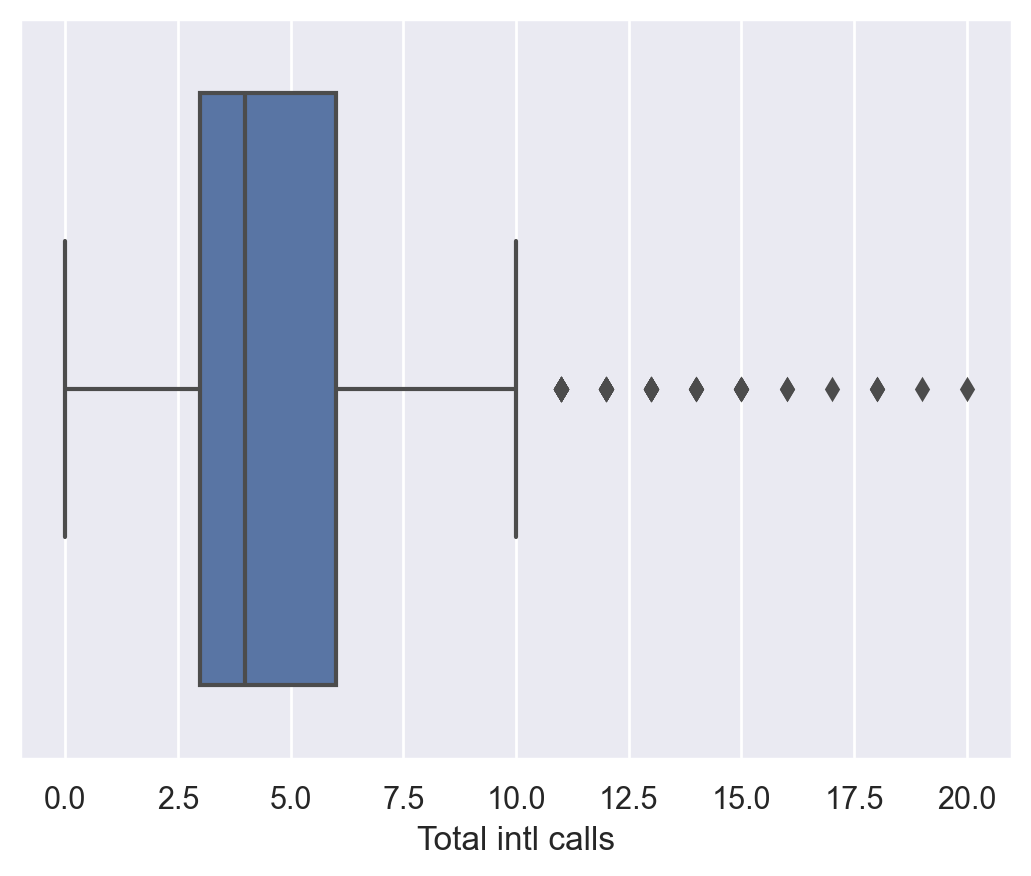

In [18]:
sns.boxplot(x="Total intl calls", data=df);

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

#### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

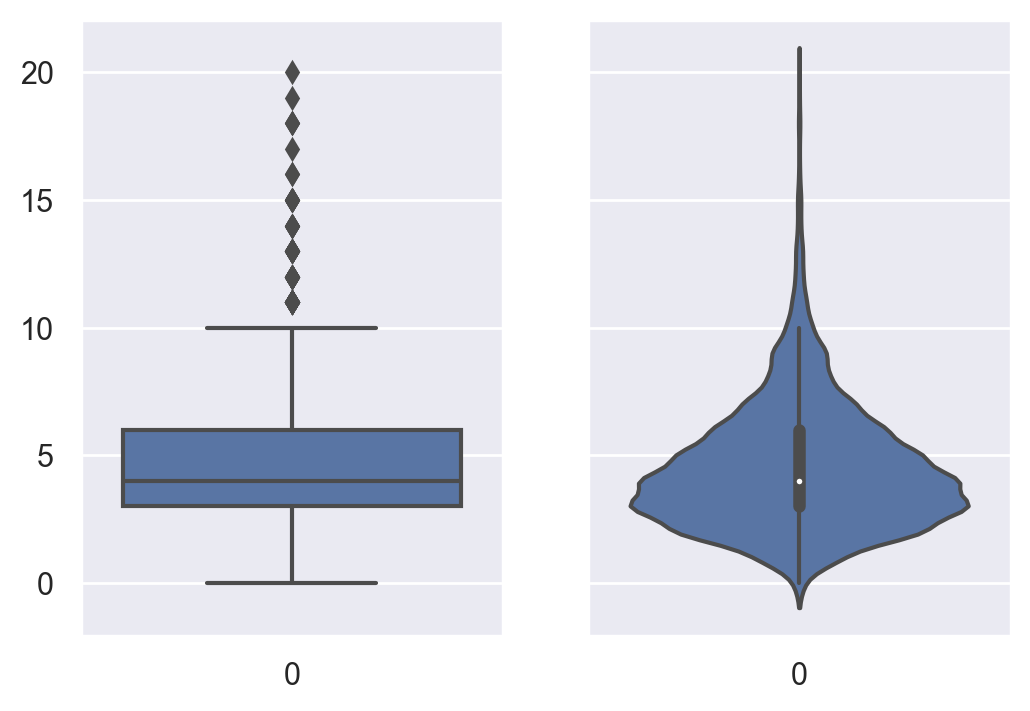

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

##### describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

In [20]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

Its output is mostly self-explanatory. *25%*, *50%* and *75%* are the corresponding [percentiles](https://en.wikipedia.org/wiki/Percentile).

## Visualizing non-numerical attributes

*Categorical features* take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a *category*, which reflects some qualitative property of this example. *Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called *ordinal*.

##### Frequency table

Let's check the class balance in our dataset by looking at the distribution of the target variable: the *churn rate*. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [21]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not *balanced*; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service.

##### Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the `seaborn`'s function [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). There is another function in `seaborn` that is somewhat confusingly called [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

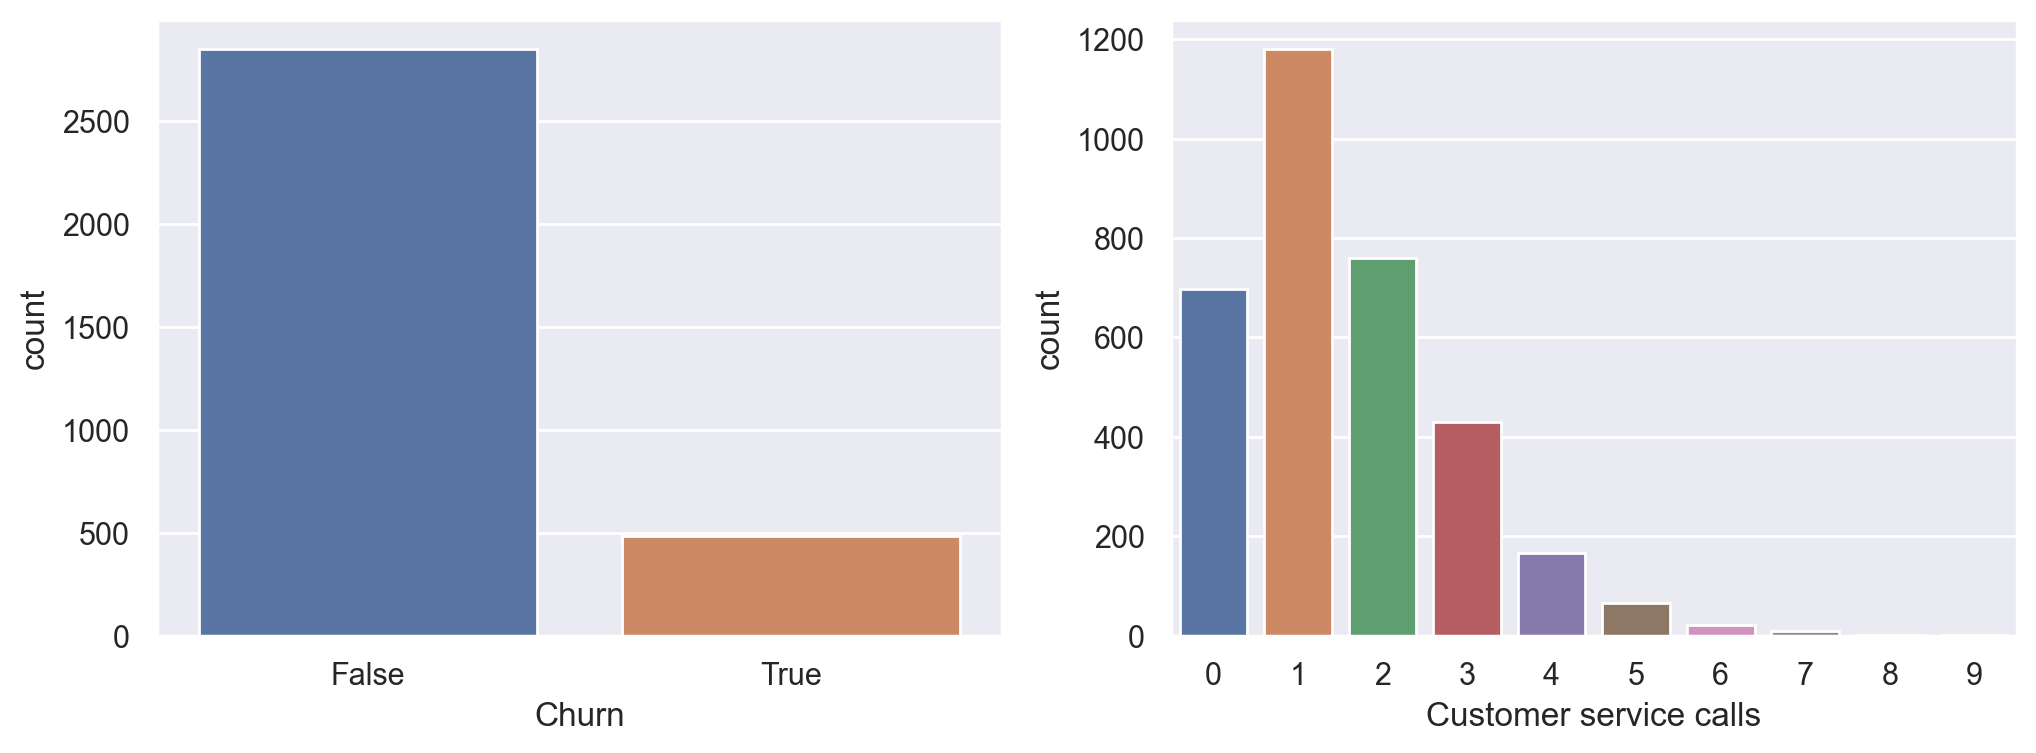

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
1. *Histograms* are best suited for looking at the distribution of numerical variables while *bar plots* are used for categorical features.
2. The values on the X-axis in the *histogram* are numerical; a *bar plot* can have any type of values on the X-axis: numbers, strings, booleans.
3. The *histogram*'s X-axis is a *Cartesian coordinate axis* along which values cannot be changed; the ordering of the *bars* is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider *ordinal* variables (like *Customer service calls* in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for *Customer service calls* on the right gives a hint that the majority of customers resolve their problems in maximum 2-3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.